# Ames housing data regression

## 1. Brief description of the data set

We will use the Ames housing data for this regression project, and the data is available from course 1 on EDA (Demo 1d) or from http://www.amstat.org/v19n3/decock/AmesHousing.xls. According to the description of Dean De Cock
Truman State University who probably first made use of this dataset (http://www.amstat.org/publications/jse/v19n3/decock.pdf), the dataset contains 82 variables, 23 nominal, 23 ordinal, 14 discrete, 20 continuous and 2 additional observation identifiers, and they are as follows.

| Variable | Description | Variable | Description |
| :-------- | :----------- | :------| :----------- |
| Order | Observation number | PID | Parcel identification number | 
| MS SubClass | Identifies the type of dwelling involved in the sale |MS Zoning | Identifies the general zoning classification of the sale |
| Lot Frontage | Linear feet of street connected to property | Lot Area | Lot size in square feet |
| Street | Type of road access to property | Alley | Type of alley access to property |
| Lot Shape | General shape of property | Land Contour | Flatness of the property |
| Utilities | Type of utilities available | Lot Config | Lot configuration |
| Land Slope | Slope of property | Neighborhood | Physical locations within Ames city limits |
| Condition 1 | Proximity to various conditions | Condition 2 | Proximity to various conditions (if more than one is present) |
| Bldg Type | Type of dwelling | House Style | Style of dwelling |
| Overall Qual | Rates the overall material and finish of the house | Overall Cond | Rates the overall condition of the house |
| Year Built | Original construction date | Year Remod/Add | Remodel date (same as construction date if no remodeling or additions) |
| Roof Style | Type of roof | Roof Matl | Roof material |
| Exterior 1 | Exterior covering on house | Exterior 2 | Exterior covering on house (if more than one material) |
| Mas Vnr Type | Masonry veneer type | Mas Vnr Area | Masonry veneer area in square feet |
| Exter Qual | Evaluates the quality of the material on the exterior | Exter Cond | Evaluates the present condition of the material on the exterior |
| Foundation | Type of foundation | Bsmt Qual | Evaluates the height of the basement |
| Bsmt Cond | Evaluates the general condition of the basement | Bsmt Exposure | Refers to walkout or garden level walls |
| BsmtFin Type 1 | Rating of basement finished area | BsmtFin SF 1 | Type 1 finished square feet |
| BsmtFinType 2	| Rating of basement finished area (if multiple types) | BsmtFin SF 2 | Type 2 finished square feet |
| Bsmt Unf SF | Unfinished square feet of basement area | Total Bsmt SF | Total square feet of basement area |
| Heating | Type of heating | HeatingQC | Heating quality and condition |
| Central Air | Central air conditioning | Electrical | Electrical system |
| 1st Flr SF | First Floor square feet | 2nd Flr SF | Second floor square feet |
| Low Qual Fin SF | Low quality finished square feet (all floors) | Gr Liv Area | Above grade (ground) living area square feet |
| Bsmt Full Bath | Basement full bathrooms | Bsmt Half Bath | Basement half bathrooms |
| Full Bath | Full bathrooms above grade | Half Bath | Half baths above grade |
| Bedroom | Bedrooms above grade (does NOT include basement bedrooms) | Kitchen | Kitchens above grade |
| KitchenQual | Kitchen quality | TotRmsAbvGrd | Total rooms above grade (does not include bathrooms) |
| Functional | Home functionality | Fireplaces | Number of fireplaces |
| FireplaceQu | Fireplace quality | Garage Type | Garage location |
| Garage Yr Blt | Year garage was built | Garage Finish | Interior finish of the garage |
| Garage Cars | Size of garage in car capacity | Garage Area | Size of garage in square feet |
| Garage Qual | Garage quality | Garage Cond | Garage condition |
| Paved Drive | Paved driveway | Wood Deck SF | Wood deck area in square feet |
| Open Porch SF | Open porch area in square feet | Enclosed Porch | Enclosed porch area in square feet |
| 3-Ssn Porch | Three season porch area in square feet | Screen Porch | Screen porch area in square feet |
| Pool Area | Pool area in square feet | Pool QC | Pool quality |
| Fence | Fence quality | Misc Feature | Miscellaneous feature not covered in other categories |
| Misc Val | Value of miscellaneous feature \$\$ | Mo Sold | Month Sold (MM) |
| Yr Sold | Year Sold (YYYY) | Sale Type | Type of sale |
| Sale Condition | Condition of sale | SalePrice | Sale price \$\$ |

The above descriptions are not exhaustive, and more information (e.g. values that each variable takes) can be found on http://jse.amstat.org/v19n3/decock/DataDocumentation.txt.

## 2. Main objective of the analysis

The main objective of this regression analysis is to predict the sale price of a house based on other attributes, and interpret the importance of each attribute. We will be focusing on the interpretation, and as such, we will first select only a handful of feature variables based on our EDA for predictions, and we will also use Lasso as our regularized regression model.

## 3. Data exploration, data cleaning and feature engineering

1. Explore correlations between feature variables and the sale price via pairplot and correlation calculations
1. Determine which feature variables to keep
1. remove outliers
1. impute missing values
1. log transform skewed values

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
data = pd.read_csv('Ames_Housing_Data.tsv', sep='\t')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
data.shape

(2930, 82)

In [5]:
data.isnull().sum().sort_values(ascending=False).head(27)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
dtype: int64

In [7]:
data[data['Garage Cond'].isnull()][['Garage Cond', 'Garage Finish', 'Garage Yr Blt', 'Garage Qual', 'Garage Type', 'SalePrice']]

,Garage Cond,Garage Finish,Garage Yr Blt,Garage Qual,Garage Type,SalePrice
27,NaN,NaN,NaN,NaN,NaN,115000
119,NaN,NaN,NaN,NaN,NaN,128950
125,NaN,NaN,NaN,NaN,NaN,84900
129,NaN,NaN,NaN,NaN,NaN,116500
130,NaN,NaN,NaN,NaN,NaN,76500
...,...,...,...,...,...,...
2913,NaN,NaN,NaN,NaN,NaN,73000
2916,NaN,NaN,NaN,NaN,NaN,92000
2918,NaN,NaN,NaN,NaN,NaN,79500
2919,NaN,NaN,NaN,NaN,NaN,90500


### 3.1. Explore correlations between feature variables and the target variable

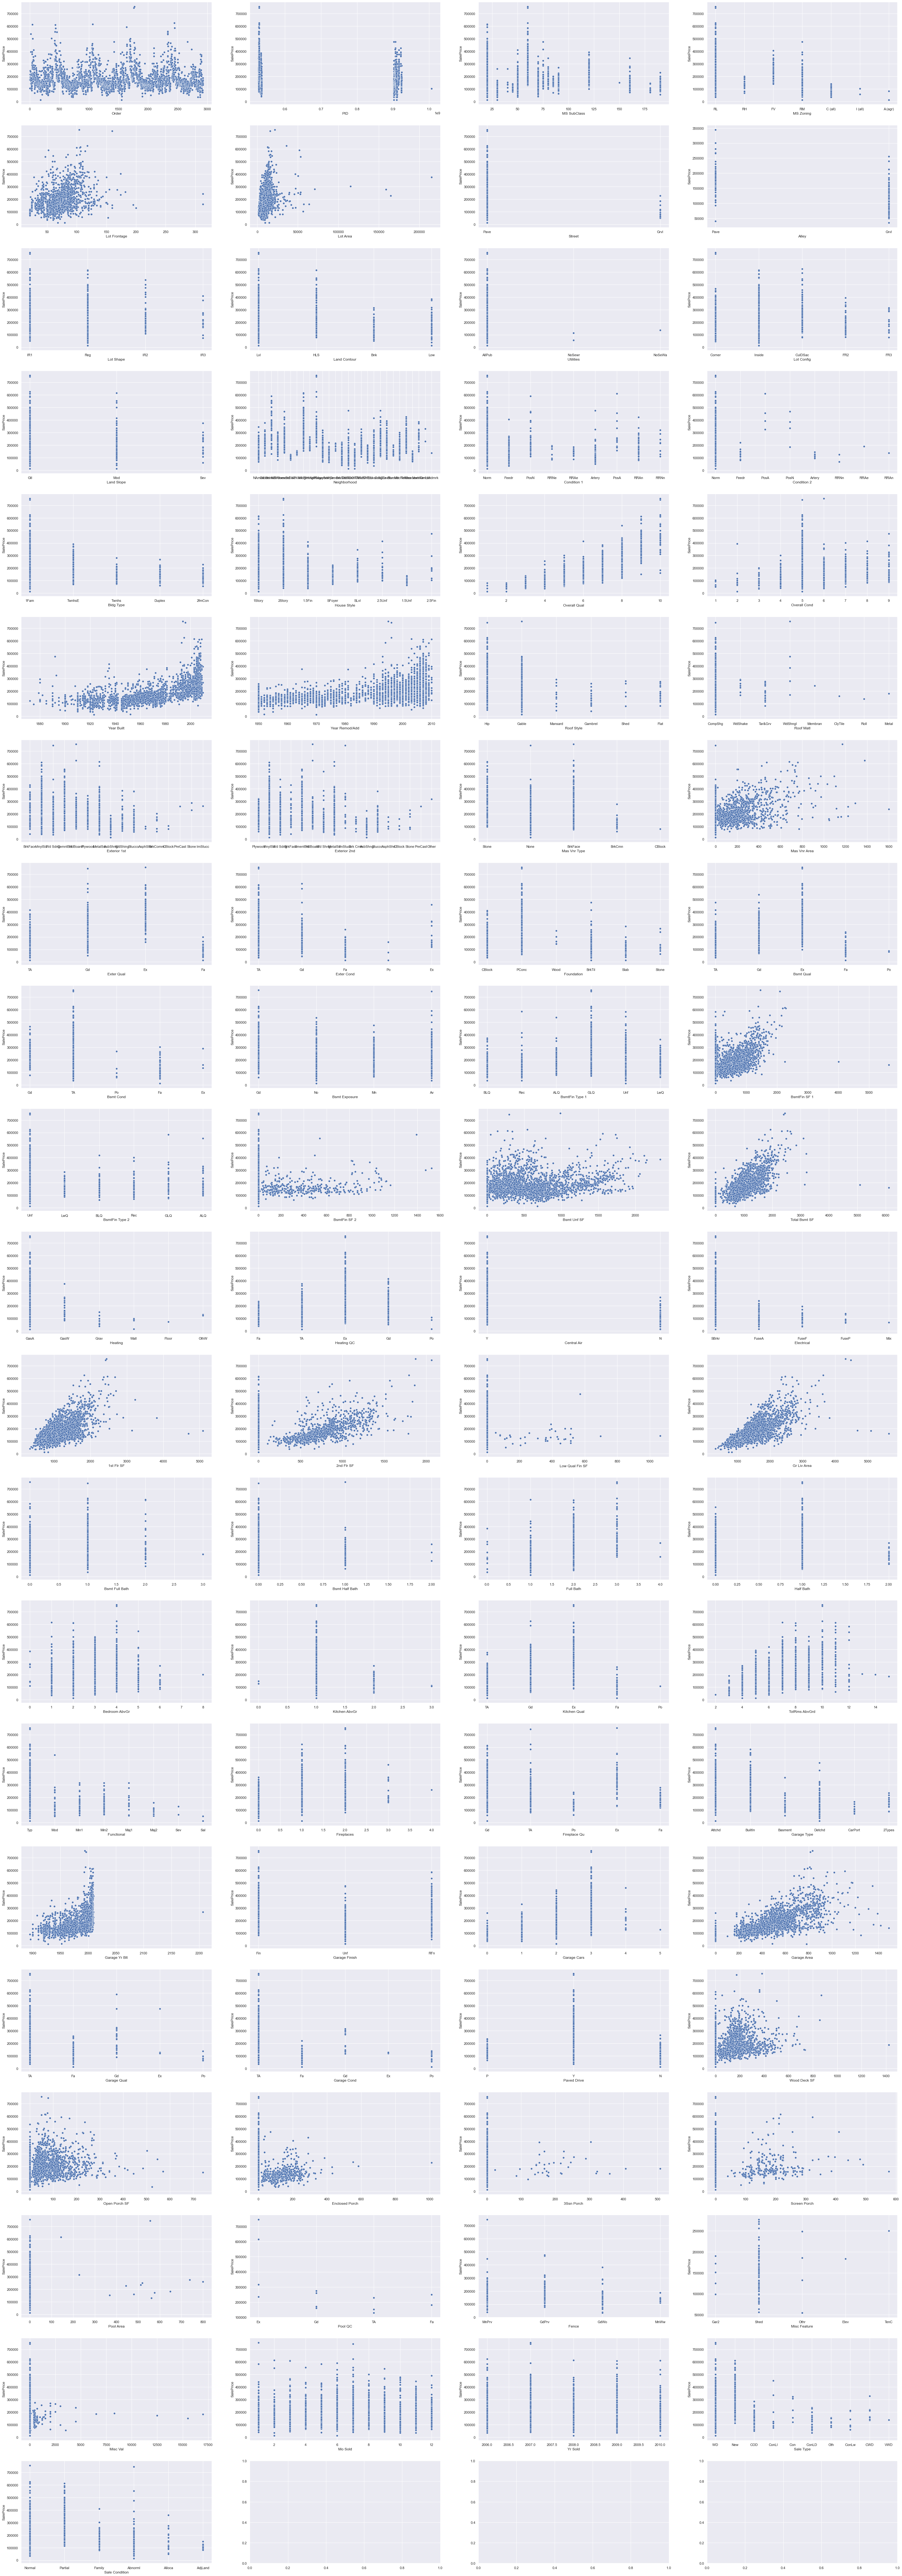

In [925]:
fig, axes = plt.subplots(21, 4, figsize=(50, 150))

feature_cols = data.columns.drop('SalePrice')

for i, feature in enumerate(feature_cols):
    sns.scatterplot(x=feature, y='SalePrice', data=data, ax=axes[i//4, i%4])

By visually examination, we expect there might be some correlation between the following feature variables and the target variable SalePrice:
- Lot Frontage
- Overall Qual
- Year Built
- Year Remod/Add
- Mas Vnr Area
- BsmtFin SF 1
- Total Bsmt SF
- 1st Flr SF
- 2nd Flr SF
- Gr Liv Area
- Garage Cars
- Garage Yr Blt
- Garage Area
- Full Bath
- Kitchen Qual
- Fireplaces
- Wood Deck SF
- Open Porch SF
- Pool QC

Furthermore, the variables Mas Vnr Area, Overall Qual, Year Built, Year Remod/Add, Total Bsmt SF, Gr Liv Area, Garage Yr Blt, Garage Cars exhibit polynomial relations with SalePrice, which we will take note of for later modeling.

### 3.2. Determine which feature variables to keep

We can further confirm/restrict the feature variables by calculating their correlations with SalePrice.

In [928]:
# select features columns with large correlations with SalePrice
correlations = data.corrwith(data.SalePrice)
feature_cols = correlations[correlations >= 0.5].index.drop('SalePrice').tolist()
feature_cols += ['Kitchen Qual', 'Pool QC']

In [956]:
df = data[feature_cols + ['SalePrice']]

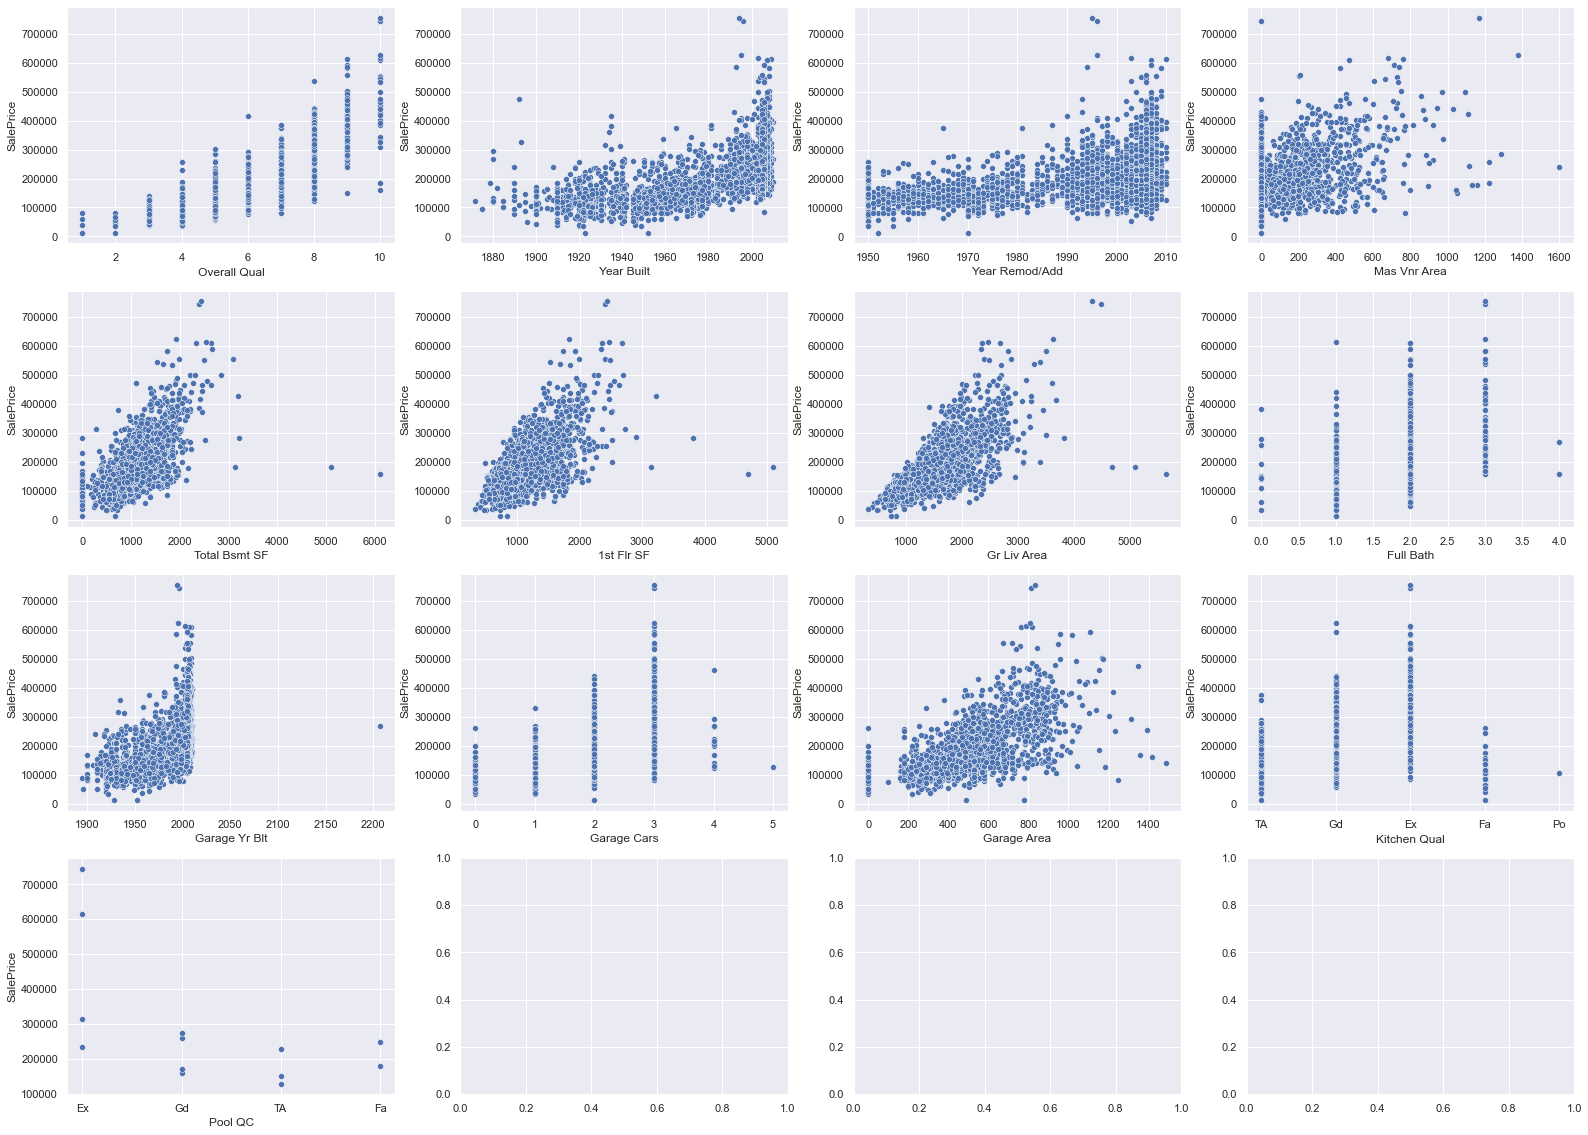

In [930]:
fig, axes = plt.subplots(4, 4, figsize=(27, 20))

for i, feature in enumerate(feature_cols):
    sns.scatterplot(x=feature, y='SalePrice', data=df, ax=axes[i//4, i%4])

### 3.3. Remove outliers

From examining the figures above and explicitly checking the dataframe observations, we find out that the outliers are those with Garage Yr Blt later than 2200, which doesn't make sense, and those with Gr Liv Area larger than 4000 square feet. We will remove them and check the figures upon their removal.

In [957]:
df = df[((df['Garage Yr Blt'] < 2050) | pd.isna(df['Garage Yr Blt']))
          & (df['Gr Liv Area'] <= 4000)]

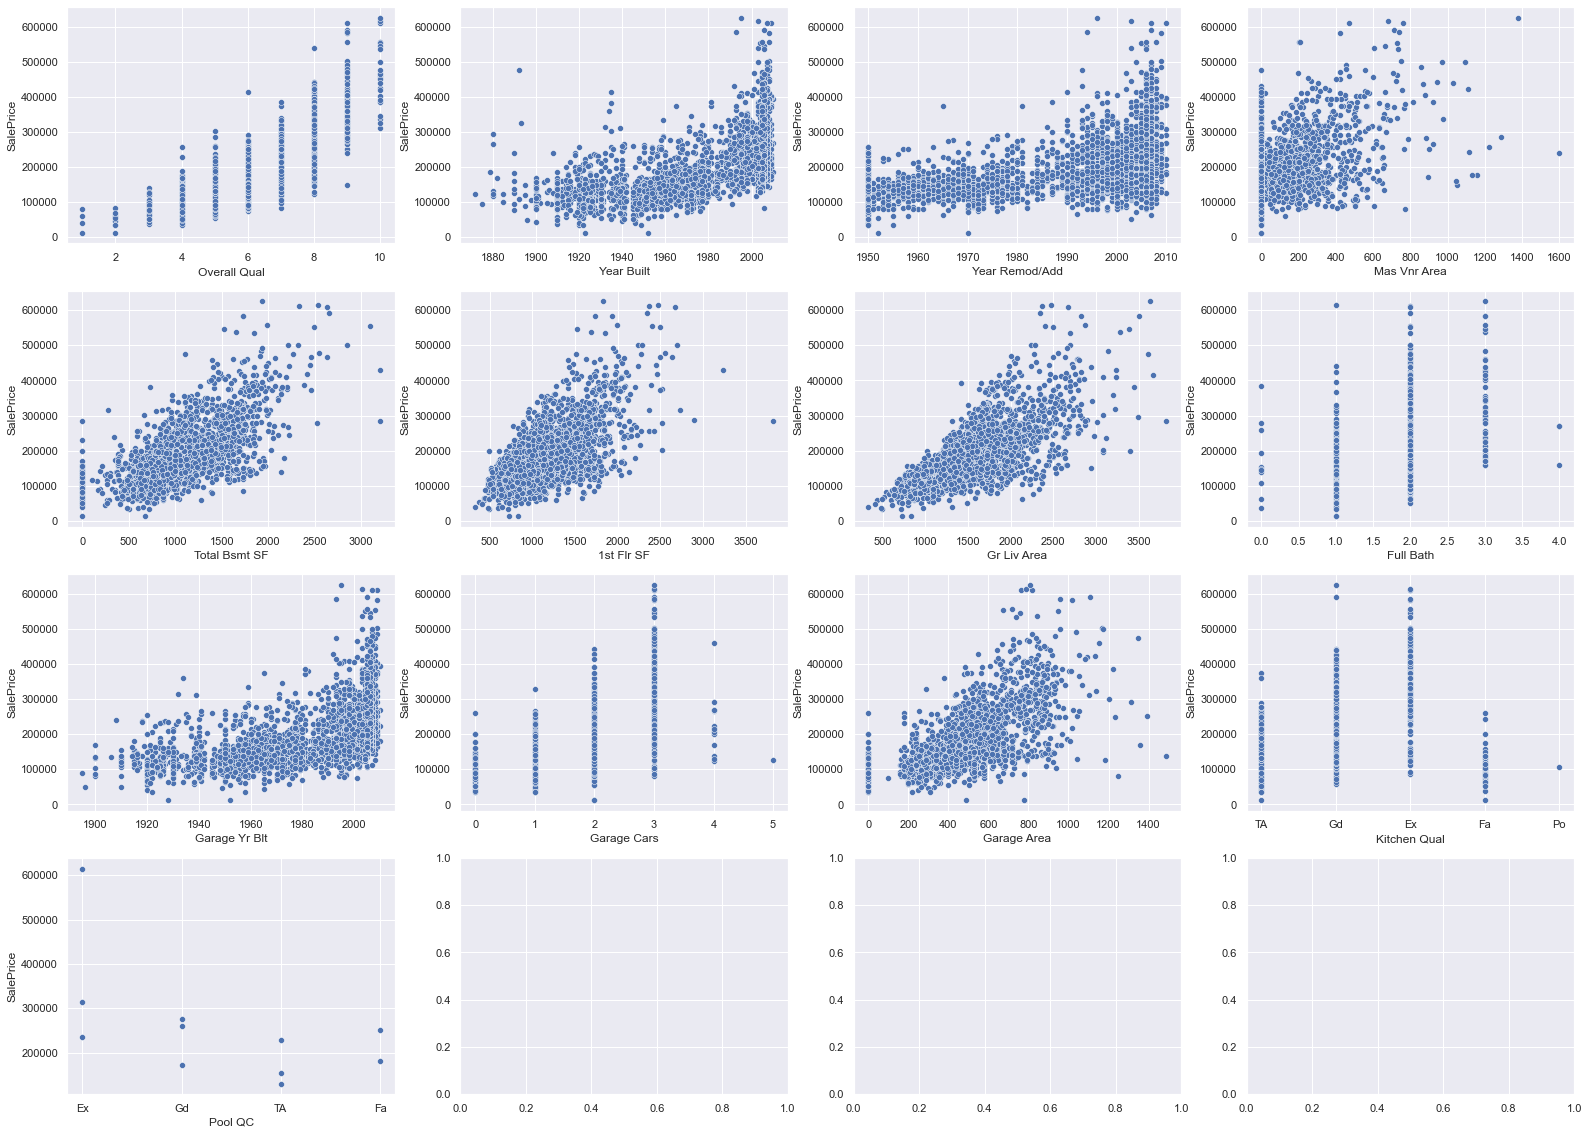

In [933]:
fig, axes = plt.subplots(4, 4, figsize=(27, 20))

for i, feature in enumerate(feature_cols):
    sns.scatterplot(x=feature, y='SalePrice', data=df, ax=axes[i//4, i%4])

### 3.4. Impute missing values

We will impute the missing values based on the following assumptions.
- Assume missing Mas Vnr Area, Garage Cars, Garage Area, Pool QC implies no such facility, and impute them with 0 or No Pool.
- Assume missing Garage Yr Blt implies no garage, and impute the year with 0.
- Assume missing Total Bsmt SF is due to mistake, and impute it with 1st Flr SF because they should be approximately the same size through observations of the dataframe df.

In [958]:
df[feature_cols].isnull().sum()

Overall Qual         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
Total Bsmt SF        1
                  ... 
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Kitchen Qual         0
Pool QC           2913
Length: 13, dtype: int64

In [959]:
df[['Total Bsmt SF', '1st Flr SF', 'Gr Liv Area']]

,Total Bsmt SF,1st Flr SF,Gr Liv Area
0,1080.0,1656,1656
1,882.0,896,896
2,1329.0,1329,1329
3,2110.0,2110,2110
4,928.0,928,1629
...,...,...,...
2925,1003.0,1003,1003
2926,864.0,902,902
2927,912.0,970,970
2928,1389.0,1389,1389


In [960]:
df[pd.isna(df['Total Bsmt SF'])]

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Yr Blt,Garage Cars,Garage Area,Kitchen Qual,Pool QC,SalePrice
1341,4,1946,1950,0.0,NaN,896,896,1,1946.0,1.0,280.0,TA,NaN,79000


In [961]:
# mute the setting with a copy warnings
pd.options.mode.chained_assignment = None

impute_dict = {
    'Mas Vnr Area': 0,
    'Garage Yr Blt': 0,
    'Garage Cars': 0,
    'Garage Area': 0,
    'Pool QC': 'No Pool',
    'Total Bsmt SF': df['1st Flr SF']
}

df.fillna(impute_dict, inplace=True)

### 3.5. Log transform skewed feature variables

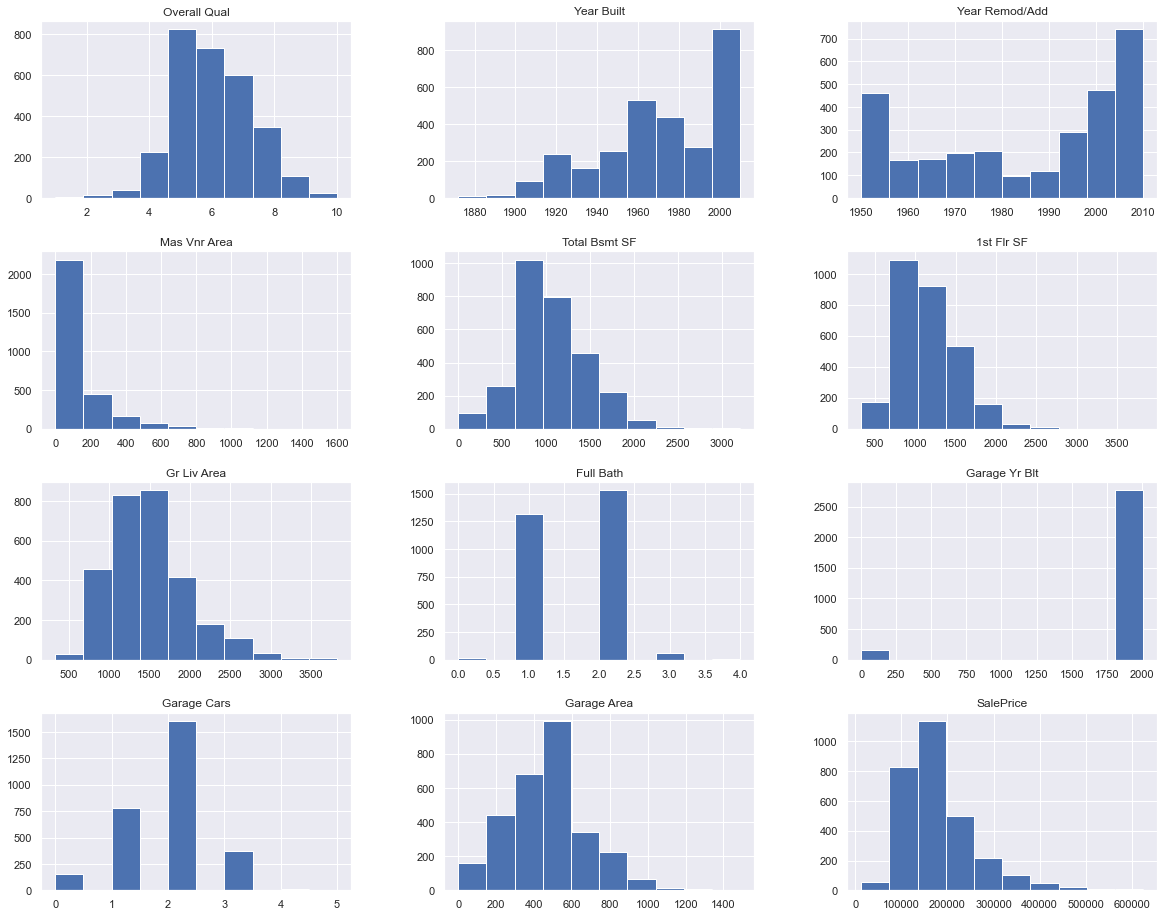

In [944]:
df.hist(figsize=(20, 16));

In [945]:
skew_limit = 0.75
skew_vals = df.skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0: 'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
Mas Vnr Area,2.577201
SalePrice,1.592472
1st Flr SF,0.943700
Gr Liv Area,0.878886
Garage Yr Blt,-3.912841


The skews of Mas Vnr Area before and after the log transformation are  2.58 and  0.54 respectively.


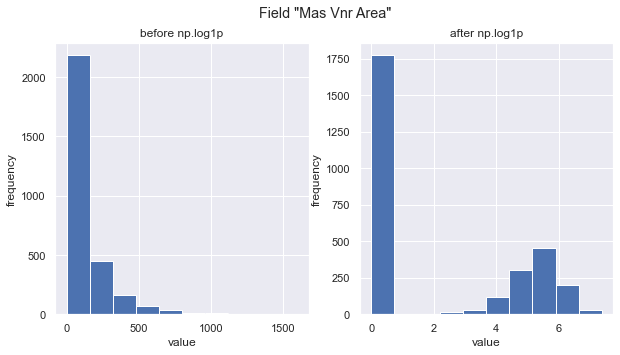

In [946]:
field = 'Mas Vnr Area'

fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

df[field].hist(ax=ax_before)

df[field].apply(np.log1p).hist(ax=ax_after)

ax_before.set(title='before np.log1p', xlabel='value', ylabel='frequency')
ax_after.set(title='after np.log1p', xlabel='value', ylabel='frequency')
fig.suptitle('Field "{}"'.format(field))
print('The skews of {field} before and after the log transformation are {before: .2f} and {after: .2f} respectively.'
     .format(field=field, before=df[field].skew(), after=df[field].apply(np.log1p).skew()))

The skew of Garage Yr Blt is due to the imputed 0, and applying a log transformation doesn't help. We will apply box cox on SalePrice later, so now we only apply log transformations on the rest of the feature variables.

In [962]:
for col in skew_cols.index.values:
    if col == 'Garage Yr Blt' or col == 'SalePrice':
        continue
    df[col] = df[col].apply(np.log1p)

## Linear regression models

In [379]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler,
                                   PowerTransformer,
                                   OneHotEncoder)
from sklearn.compose import (TransformedTargetRegressor,
                             ColumnTransformer)
# from sklearn.compose import make_column_selector as selector

Due to technical reasons (the categorical feature variable Kitchen QC has only few observations and OneHotEncoder doesn't work well in a pipeline), we will first fit-transform the categorical variables for the dataset, and use the resulting dataset for all the following linear regression models.

In [963]:
df2 = df.copy()

categorical_cols = df2.columns[df2.dtypes == object]

ohc = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(transformers=[
    ('ohc', ohc, categorical_cols)
])


new_data = preprocessor.fit_transform(df2)

new_cols = preprocessor.named_transformers_['ohc'].get_feature_names(categorical_cols)

new_df = pd.DataFrame(new_data.toarray(), columns=new_cols, index=df2.index)

df2.drop(categorical_cols, axis=1, inplace=True)

df2 = pd.concat([df2, new_df], axis=1)

df2

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Yr Blt,Garage Cars,Garage Area,SalePrice,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Pool QC_Fa,Pool QC_Gd,Pool QC_No Pool,Pool QC_TA
0,6,1960,1960,4.727388,1080.0,7.412764,7.412764,1,1960.0,2.0,528.0,215000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,5,1961,1961,0.000000,882.0,6.799056,6.799056,1,1961.0,1.0,730.0,105000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,6,1958,1958,4.691348,1329.0,7.192934,7.192934,1,1958.0,1.0,312.0,172000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7,1968,1968,0.000000,2110.0,7.654917,7.654917,2,1968.0,2.0,522.0,244000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,1997,1998,0.000000,928.0,6.834109,7.396335,2,1997.0,2.0,482.0,189900,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,1984,1984,0.000000,1003.0,6.911747,6.911747,1,1984.0,2.0,588.0,142500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2926,5,1983,1983,0.000000,864.0,6.805723,6.805723,1,1983.0,2.0,484.0,131000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2927,5,1992,1992,0.000000,912.0,6.878326,6.878326,1,0.0,0.0,0.0,132000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2928,5,1974,1975,0.000000,1389.0,7.237059,7.237059,1,1975.0,2.0,418.0,170000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [245]:
import pprint

df3 = df2.copy()

categorical_cols = df3.columns[df3.dtypes == object]

ohc = OneHotEncoder()

col = 'Kitchen Qual'

new_data = ohc.fit_transform(df3[[col]])

df3.drop(col, axis=1, inplace=True)

cats = ohc.categories_

print(cats)

new_cols = ['_'.join([col, cat]) for cat in cats[0]]

new_df = pd.DataFrame(new_data.toarray(), columns=new_cols)

df3 = pd.concat([df3, new_df], axis=1)

# pprint.pprint(df3)

pprint.pprint(df3[df3['Kitchen Qual_Gd'].isnull()])

col = 'Pool QC'

new_data = ohc.fit_transform(df3[[col]])

df3.drop(col, axis=1, inplace=True)

cats = ohc.categories_

print(cats)

new_cols = ['_'.join([col, cat]) for cat in cats[0]]

new_df = pd.DataFrame(new_data.toarray(), columns=new_cols)

df3 = pd.concat([df3, new_df], axis=1)

df3

[array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object)]
Empty DataFrame
Columns: [Overall Qual, Year Built, Year Remod/Add, Mas Vnr Area, Total Bsmt SF, 1st Flr SF, Gr Liv Area, Full Bath, Garage Yr Blt, Garage Cars, Garage Area, Pool QC, SalePrice, Kitchen Qual_Ex, Kitchen Qual_Fa, Kitchen Qual_Gd, Kitchen Qual_Po, Kitchen Qual_TA]
Index: []
[array(['Ex', 'Fa', 'Gd', 'No Pool', 'TA'], dtype=object)]


,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Yr Blt,Garage Cars,...,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_No Pool,Pool QC_TA
0,6,1960,1960,4.727388,1080.0,7.412764,7.412764,1,1960.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5,1961,1961,0.000000,882.0,6.799056,6.799056,1,1961.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,6,1958,1958,4.691348,1329.0,7.192934,7.192934,1,1958.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7,1968,1968,0.000000,2110.0,7.654917,7.654917,2,1968.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,1997,1998,0.000000,928.0,6.834109,7.396335,2,1997.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,6,1984,1984,0.000000,1003.0,6.911747,6.911747,1,1984.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2920,5,1983,1983,0.000000,864.0,6.805723,6.805723,1,1983.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2921,5,1992,1992,0.000000,912.0,6.878326,6.878326,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2922,5,1974,1975,0.000000,1389.0,7.237059,7.237059,1,1975.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [192]:
df3 = df2.copy()

categorical_cols = df3.columns[df3.dtypes == object].tolist()

ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    new_data = ohc.fit_transform(df3[[col]])
    
    df3 = df3.drop(col, axis=1)
    
    cats = ohc.categories_
    
    new_cols = ['_'.join([col, cat]) for cat in cats[0]]
    
    new_df = pd.DataFrame(new_data.toarray(), columns=new_cols)
    
    df3 = pd.concat([df3, new_df], axis=1)
    
#     print(new_cols)
    
#     print(new_df)
    
df3

TypeError: sequence item 1: expected str instance, float found

In [167]:
df3 = df2.copy()

categorical_cols = df3.columns[df3.dtypes == object]

ohc = OneHotEncoder()

for col in categorical_cols:
    
    new_data = ohc.fit_transform(df3[[col]])
    
    cats = ohc.categories_
    
    new_cols = ['_'.join([col, cat]) for cat in cats[0]]
    
    new_df = pd.DataFrame(new_data.toarray(), columns=new_cols)
    
    df3.drop(col, axis=1, inplace=True)
    
    df3 = pd.concat([df3, new_df], axis=1)
    
df3

TypeError: sequence item 1: expected str instance, float found

### Simple linear regression as a baseline

In [964]:
X = df2.drop('SalePrice', axis=1)
y = df2['SalePrice']

numeric_cols = df2.columns[df2.dtypes != object].drop('SalePrice')

lr = LinearRegression()
scaler = StandardScaler()
pt = PowerTransformer(method='box-cox')

# Only scale the numeric columns; the remainding categorical columns pass through
preprocessor = ColumnTransformer(transformers=[('scaler', scaler, numeric_cols)],
                                remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', lr)
])

estimator = TransformedTargetRegressor(regressor=pipeline,
                                      transformer=pt)

lr_scores = cross_val_score(estimator, X, y, scoring='r2', cv=5)

lr_scores_mean = lr_scores.mean()

lr_scores_mean

0.8786272502778616

In [965]:
estimator.fit(X, y)

lr_coef = estimator.regressor_.named_steps['lr'].coef_
lr_feature_names = X.columns.tolist()

lr_feature_importances = pd.DataFrame(zip(lr_feature_names, lr_coef),
                                      columns=['Feature', 'Coefficient'])

lr_feature_importances.sort_values(by='Coefficient', ascending=False, inplace=True)

lr_feature_importances.reset_index(drop=True, inplace=True)

lr_feature_importances

,Feature,Coefficient
0,Gr Liv Area,0.335789
1,Overall Qual,0.290462
2,Year Built,0.142006
3,Total Bsmt SF,0.141237
4,Year Remod/Add,0.106547
...,...,...
14,Pool QC_No Pool,-0.011368
15,Full Bath,-0.046963
16,Kitchen Qual_Fa,-0.065448
17,Kitchen Qual_Gd,-0.121770


**Testing OneHotEncoding with handle_unknown='ignore'**

In [622]:
df2 = data[feature_cols + ['SalePrice']]
df2 = df2[((df2['Garage Yr Blt'] < 2050) | pd.isna(df2['Garage Yr Blt']))
          & (df2['Gr Liv Area'] <= 4000)]
# df2.reset_index(drop=True, inplace=True)

impute_dict = {
    'Mas Vnr Area': 0,
    'Garage Yr Blt': 0,
    'Garage Cars': 0,
    'Garage Area': 0,
    'Pool QC': 'No Pool',
    'Total Bsmt SF': df2['1st Flr SF']
}
df2.fillna(impute_dict, inplace=True)

skew_limit = 0.75
skew_vals = df2.skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0: 'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

for col in skew_cols.index.values:
    if col == 'Garage Yr Blt' or col == 'SalePrice':
        continue
    df2[col] = df2[col].apply(np.log1p)
    
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler,
                                   PowerTransformer,
                                   OneHotEncoder)
from sklearn.compose import (TransformedTargetRegressor,
                             ColumnTransformer)
# from sklearn.compose import make_column_selector as selector
from scipy.stats import boxcox

X = df2.drop('SalePrice', axis=1)
y = df2['SalePrice']

numeric_cols = X.columns[X.dtypes != object]
categorical_cols = X.columns[X.dtypes == object]

lr = LinearRegression()
scaler = StandardScaler()
pt = PowerTransformer(method='box-cox')
ohc = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('scaler', scaler, numeric_cols),
    ('ohc', ohc, categorical_cols)
])

new_data = preprocessor.fit_transform(df2)
new_cols = (numeric_cols.tolist()
            + preprocessor.named_transformers_['ohc'].get_feature_names(categorical_cols).tolist()
           )

new_df = pd.DataFrame(new_data, columns=new_cols, index=df2.index)

df3 = pd.concat([new_df, df2['SalePrice']], axis=1)
X_new = df3.drop('SalePrice', axis=1)
y_new = df3['SalePrice']

pipeline = Pipeline(steps=[
    ('lr', lr)
])

estimator = TransformedTargetRegressor(regressor=pipeline,
                                      transformer=pt)

scores = cross_val_score(pipeline, X_new, y_new, scoring='r2', cv=4)

scores.mean()

0.8278433851798837

In [623]:
df2 = data[feature_cols + ['SalePrice']]
df2 = df2[((df2['Garage Yr Blt'] < 2050) | pd.isna(df2['Garage Yr Blt']))
          & (df2['Gr Liv Area'] <= 4000)]

impute_dict = {
    'Mas Vnr Area': 0,
    'Garage Yr Blt': 0,
    'Garage Cars': 0,
    'Garage Area': 0,
    'Pool QC': 'No Pool',
    'Total Bsmt SF': df2['1st Flr SF']
}
df2.fillna(impute_dict, inplace=True)

skew_limit = 0.75
skew_vals = df2.skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0: 'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

for col in skew_cols.index.values:
    if col == 'Garage Yr Blt' or col == 'SalePrice':
        continue
    df2[col] = df2[col].apply(np.log1p)
    
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler,
                                   PowerTransformer,
                                   OneHotEncoder)
from sklearn.compose import (TransformedTargetRegressor,
                             ColumnTransformer)
# from sklearn.compose import make_column_selector as selector

X = df2.drop('SalePrice', axis=1)
y = df2['SalePrice']

numeric_cols = X.columns[X.dtypes != object]
categorical_cols = X.columns[X.dtypes == object]

lr = LinearRegression()
scaler = StandardScaler()
pt = PowerTransformer(method='box-cox')
ohc = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('scaler', scaler, numeric_cols),
    ('ohc', ohc, categorical_cols)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', lr)
])

estimator = TransformedTargetRegressor(regressor=pipeline,
                                      transformer=pt)

scores = cross_val_score(estimator, X, y, scoring='r2', cv=4)

scores.mean()

0.8794459044835051

### Adding polynomial features

In [970]:
X = df2.drop('SalePrice', axis=1)
y = df2['SalePrice']

numeric_cols = df2.columns[df2.dtypes != object].drop('SalePrice')

polynomial_cols = ['Mas Vnr Area', 'Overall Qual', 'Year Built',
                   'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area',
                   'Garage Yr Blt', 'Garage Cars']

linear_cols = numeric_cols.drop(polynomial_cols).tolist()

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
pf = PolynomialFeatures()
lr = LinearRegression()
pt = PowerTransformer(method='box-cox')

# Apply polynomial transformations and scaling to polynomial columns
# Apply only scaling to linear columns
# Categorical columns pass through
preprocessor_pf_scaler = Pipeline(steps=[
    ('pf', pf),
    ('scaler', scaler)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('preprocessor_pf_scaler', preprocessor_pf_scaler, polynomial_cols),
        ('preprocessor_scaler', scaler, linear_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', lr)
])

estimator = TransformedTargetRegressor(regressor=pipeline,
                                      transformer=pt)

params = {'regressor__preprocessor__preprocessor_pf_scaler__pf__degree': [1, 2, 3]}

grid = GridSearchCV(estimator, param_grid=params, scoring='r2')

grid.fit(X, y)

grid.best_score_, grid.best_params_

(0.8876274422224981,
 {'regressor__preprocessor__preprocessor_pf_scaler__pf__degree': 2})

In [968]:
pf_score = grid.best_score_

In [969]:
feature_names_polynomial = (grid.best_estimator_
 .regressor_
 .named_steps['preprocessor']
 .named_transformers_['preprocessor_pf_scaler']
 .named_steps['pf']
 .get_feature_names(polynomial_cols)
)

feature_names_linear = linear_cols

feature_names = feature_names_polynomial + feature_names_linear

feature_coefs = (grid.best_estimator_
                 .regressor_
                 .named_steps['lr']
                 .coef_
                )

feature_importances = pd.DataFrame(zip(feature_names, feature_coefs), columns=['Feature', 'Coefficient'])
feature_importances.sort_values(by='Coefficient', ascending=False, inplace=True)
feature_importances.reset_index(drop=True, inplace=True)

feature_importances

,Feature,Coefficient
0,Year Remod/Add^2,11.980667
1,Year Built,11.810861
2,Overall Qual,4.725063
3,Year Remod/Add Gr Liv Area,3.604968
4,Gr Liv Area^2,1.178779
...,...,...
51,Overall Qual Year Built,-2.566030
52,Gr Liv Area,-3.168601
53,Year Built Year Remod/Add,-5.610220
54,Year Built^2,-7.538447


In [845]:
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin

def get_feature_out(estimator, feature_in):
    if hasattr(estimator,'get_feature_names'):
        if isinstance(estimator, _VectorizerMixin):
            # handling all vectorizers
            return [f'vec_{f}' \
                for f in estimator.get_feature_names()]
        else:
            return estimator.get_feature_names(feature_in)
    elif isinstance(estimator, SelectorMixin):
        return np.array(feature_in)[estimator.get_support()]
    else:
        return feature_in


def get_ct_feature_names(ct):
    # handles all estimators, pipelines inside ColumnTransfomer
    # doesn't work when remainder =='passthrough'
    # which requires the input column names.
    output_features = []

    for name, estimator, features in ct.transformers_:
        if name!='remainder':
            if isinstance(estimator, Pipeline):
                current_features = features
                for step in estimator:
                    current_features = get_feature_out(step, current_features)
                features_out = current_features
            else:
                features_out = get_feature_out(estimator, features)
            output_features.extend(features_out)
        elif estimator=='passthrough':
            output_features.extend(ct._feature_names_in[features])
                
    return output_features

feature_names = get_ct_feature_names(grid.best_estimator_.regressor_.named_steps['preprocessor'])
feature_coefs = grid.best_estimator_.regressor_.named_steps['lr'].coef_

pd.DataFrame(zip(feature_names, feature_coefs))#.sort_values(by=1, ascending=False)

,0,1
0,1,-2.240790e-12
1,Mas Vnr Area,-6.954128e-02
2,Overall Qual,4.725063e+00
3,Year Built,1.181086e+01
4,Year Remod/Add,-9.984639e+00
...,...,...
51,Kitchen Qual_TA,-1.638188e-01
52,Pool QC_Fa,-3.762792e-03
53,Pool QC_Gd,7.037366e-03
54,Pool QC_No Pool,-7.791639e-03


### Regularization regression

In [975]:
X = df2.drop('SalePrice', axis=1)
y = df2['SalePrice']

numeric_cols = df2.columns[df2.dtypes != object].drop('SalePrice')

polynomial_cols = ['Mas Vnr Area', 'Overall Qual', 'Year Built',
                   'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area',
                   'Garage Yr Blt', 'Garage Cars']

linear_cols = numeric_cols.drop(polynomial_cols).tolist()

from sklearn.linear_model import Lasso

scaler = StandardScaler()
pf = PolynomialFeatures(include_bias=False)
las = Lasso(random_state=7242, max_iter=1e5)
pt = PowerTransformer(method='box-cox')

preprocessor_pf_scaler = Pipeline(steps=[
    ('pf', pf),
    ('scaler', scaler)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('preprocessor_pf_scaler', preprocessor_pf_scaler, polynomial_cols),
        ('preprocessor_scaler', scaler, linear_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('las', las)
])

estimator = TransformedTargetRegressor(regressor=pipeline,
                                      transformer=pt)

params = {
    'regressor__preprocessor__preprocessor_pf_scaler__pf__degree': [1, 2, 3],
    'regressor__las__alpha': np.geomspace(0.0001, 1, 30)
}

grid = GridSearchCV(estimator, param_grid=params, scoring='r2', n_jobs=-1)

grid.fit(X, y)

grid.best_score_, grid.best_params_

(0.8901892311753995,
 {'regressor__las__alpha': 0.0002592943797404667,
  'regressor__preprocessor__preprocessor_pf_scaler__pf__degree': 3})

In [977]:
lasso_score = grid.best_score_

In [979]:
pd.set_option('display.max_rows', None)
feature_names_polynomial = (grid.best_estimator_
 .regressor_
 .named_steps['preprocessor']
 .named_transformers_['preprocessor_pf_scaler']
 .named_steps['pf']
 .get_feature_names(polynomial_cols)
)

feature_names_linear = linear_cols

feature_names = feature_names_polynomial + feature_names_linear

feature_coefs = (grid.best_estimator_
                 .regressor_
                 .named_steps['las']
                 .coef_
                )

feature_importances = pd.DataFrame(zip(feature_names, feature_coefs), columns=['Feature', 'Coefficient'])
feature_importances.sort_values(by='Coefficient', ascending=False, inplace=True)
feature_importances.reset_index(drop=True, inplace=True)

feature_importances

,Feature,Coefficient
0,Overall Qual,0.933352
1,Overall Qual^3,0.826282
2,Overall Qual Gr Liv Area^2,0.449830
3,Overall Qual Total Bsmt SF^2,0.320998
4,Year Remod/Add^2 Total Bsmt SF,0.251772
5,Mas Vnr Area^2 Total Bsmt SF,0.231638
6,Year Built,0.220418
7,Gr Liv Area^3,0.219468
8,Overall Qual Gr Liv Area Garage Cars,0.190715
9,Overall Qual Gr Liv Area Garage Yr Blt,0.106919


As we can see above, a lot of feature coefficients zeroed out, which demonstrates the interpretability of the Lasso model.

In [980]:
pd.set_option('display.max_rows', 10)

For completion, we also include ridge regression.

In [971]:
X = df2.drop('SalePrice', axis=1)
y = df2['SalePrice']

numeric_cols = df2.columns[df2.dtypes != object].drop('SalePrice')

polynomial_cols = ['Mas Vnr Area', 'Overall Qual', 'Year Built',
                   'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area',
                   'Garage Yr Blt', 'Garage Cars']

linear_cols = numeric_cols.drop(polynomial_cols).tolist()

from sklearn.linear_model import Ridge

scaler = StandardScaler()
pf = PolynomialFeatures(include_bias=False)
ridge = Ridge(random_state=7242)
pt = PowerTransformer(method='box-cox')

preprocessor_pf_scaler = Pipeline(steps=[
    ('pf', pf),
    ('scaler', scaler)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('preprocessor_pf_scaler', preprocessor_pf_scaler, polynomial_cols),
        ('preprocessor_scaler', scaler, linear_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', ridge)
])

estimator = TransformedTargetRegressor(regressor=pipeline,
                                      transformer=pt)

params = {
    'regressor__preprocessor__preprocessor_pf_scaler__pf__degree': [1, 2, 3],
    'regressor__ridge__alpha': np.geomspace(0.01, 10, 30)
}

grid = GridSearchCV(estimator, param_grid=params, scoring='r2', n_jobs=-1)

grid.fit(X, y)

grid.best_score_, grid.best_params_

(0.88881883068941,
 {'regressor__preprocessor__preprocessor_pf_scaler__pf__degree': 3,
  'regressor__ridge__alpha': 3.039195382313198})

In [973]:
ridge_score = grid.best_score_

In [974]:
feature_names_polynomial = (grid.best_estimator_
 .regressor_
 .named_steps['preprocessor']
 .named_transformers_['preprocessor_pf_scaler']
 .named_steps['pf']
 .get_feature_names(polynomial_cols)
)

feature_names_linear = linear_cols

feature_names = feature_names_polynomial + feature_names_linear

feature_coefs = (grid.best_estimator_
                 .regressor_
                 .named_steps['ridge']
                 .coef_
                )

feature_importances = pd.DataFrame(zip(feature_names, feature_coefs), columns=['Feature', 'Coefficient'])
feature_importances.sort_values(by='Coefficient', ascending=False, inplace=True)
feature_importances.reset_index(drop=True, inplace=True)

feature_importances

,Feature,Coefficient
0,Year Built,0.332241
1,Overall Qual^3,0.302225
2,Mas Vnr Area Overall Qual Total Bsmt SF,0.291325
3,Mas Vnr Area^2 Total Bsmt SF,0.290473
4,Overall Qual,0.288998
...,...,...
170,Mas Vnr Area Total Bsmt SF^2,-0.170876
171,Overall Qual Year Built^2,-0.220179
172,Overall Qual^2,-0.260735
173,Overall Qual^2 Year Remod/Add,-0.305559


We now compare the accuracy in terms of R2 score between different models.

In [983]:
pd.DataFrame({
    'Simple linear regression': lr_scores_mean,
    'Linear regression with polynomial features': pf_score,
    'Lasso regression with polynomial features': lasso_score
}, index=[1])

,Simple linear regression,Linear regression with polynomial features,Lasso regression with polynomial features
1,0.878627,0.887627,0.890189


## Recommended model

As we can see, adding polynomial features improved the score, and using Lasso increases both the score and the interpretability (a lot of feature coefficients zeroed out). Therefore, we recommend Lasso with polynomial features as our final model.

## Key Findings and Insights

By examining the feature importances of the Lasso model, we realize that the following features and some of their interactions have positive impacts on the sale price:
- Overall Qual
- Gr Liv Area
- Total Bsmt SF
- Year Built,

while the following features have negative impacts on the sale price:
- Kitchen Qual_Gd
- Mas Vnr Area Total Bsmt SF^2
- Mas Vnr Area Total Bsmt SF Gr Liv Area
- Total Bsmt SF Garage Yr Blt Garage Cars
- Kitchen Qual_TA
- Year Built Total Bsmt SF^2
- Overall Qual^2 Year Built.

The positive-impact features make much sense, and it reflects the preference over newer-built houses with overall higer-quality, larger above-ground living area, larger total basement area.

On the other hand, the negative-impact features do not admit a clear interpretation. It could be argued that those feature interactions have negative coefficients to compensate for the positive coefficients of their cubic terms, but it is indeed intriguing that good kitchen quality also had negative impact on the sale price. This needs further investigation.

## Suggestions for next steps

As mentioned above, some negative-impact features don't make much sense, and this might be due to insufficient data on these features. Therefore, one possible step is to collect more data points on e.g. kitchen quality to improve the quality of the dataset.

Furthermore, certain features such as air quality and crime rates are not present in this dataset, and can be collected to improve both the predictions and interpretability of our regression model.